In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Multi Linear Regression\50_Startups.csv")

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df=pd.get_dummies(dataset.State)
df.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [6]:
dataset = pd.concat([df,dataset],axis=1)

In [7]:
dataset= dataset.drop('State',axis=1)

In [8]:
dataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   California       50 non-null     uint8  
 1   Florida          50 non-null     uint8  
 2   New York         50 non-null     uint8  
 3   R&D Spend        50 non-null     float64
 4   Administration   50 non-null     float64
 5   Marketing Spend  50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [10]:
dataset.California=dataset.California.replace(False,0).replace(True,1)

In [11]:
dataset.Florida=dataset.Florida.replace(False,0).replace(True,1)
dataset['New York']=dataset['New York'].replace(False,0).replace(True,1)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   California       50 non-null     uint8  
 1   Florida          50 non-null     uint8  
 2   New York         50 non-null     uint8  
 3   R&D Spend        50 non-null     float64
 4   Administration   50 non-null     float64
 5   Marketing Spend  50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [13]:
dataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
rg = LinearRegression()
rg.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = rg.predict(X_test)

In [18]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 46092.08  42559.73]
 [135430.85 146121.95]
 [112694.29 122776.86]
 [115060.03 110352.25]
 [109511.94 105733.54]
 [182639.16 191050.39]
 [ 49744.6   35673.41]
 [ 98497.91  96778.92]
 [ 46457.9   64926.08]
 [172782.3  166187.94]]


# Visualizations

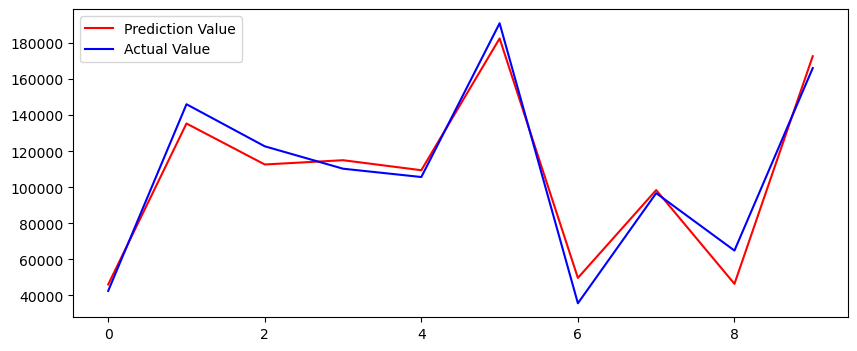

In [19]:
plt.figure(figsize=(10,4))
plt.plot(y_pred,color = 'red',label = 'Prediction Value')
plt.plot(y_test,color = 'blue',label = 'Actual Value')
plt.legend()
plt.show()

C:\Users\Yash\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


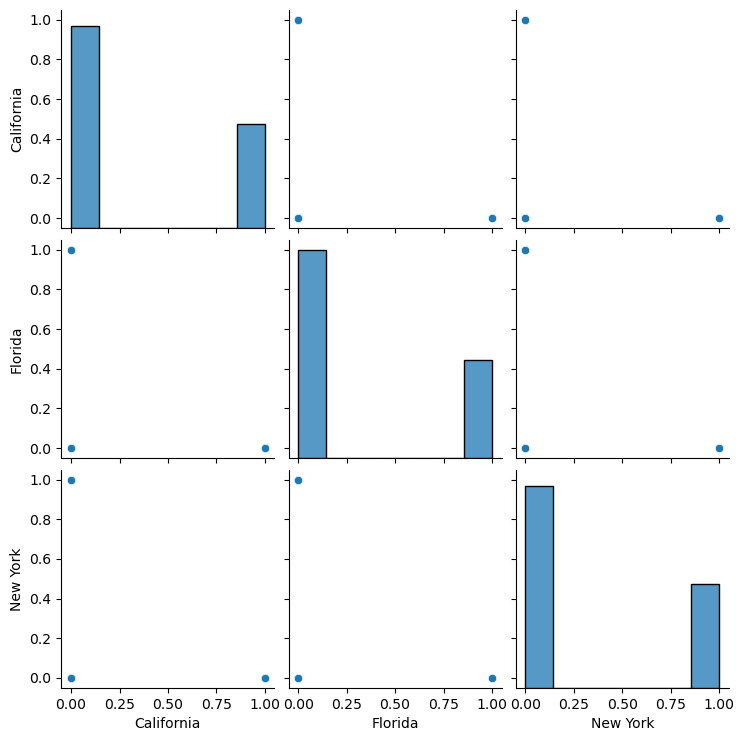

In [20]:
sns.pairplot(df)
plt.show()

C:\Users\Yash\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


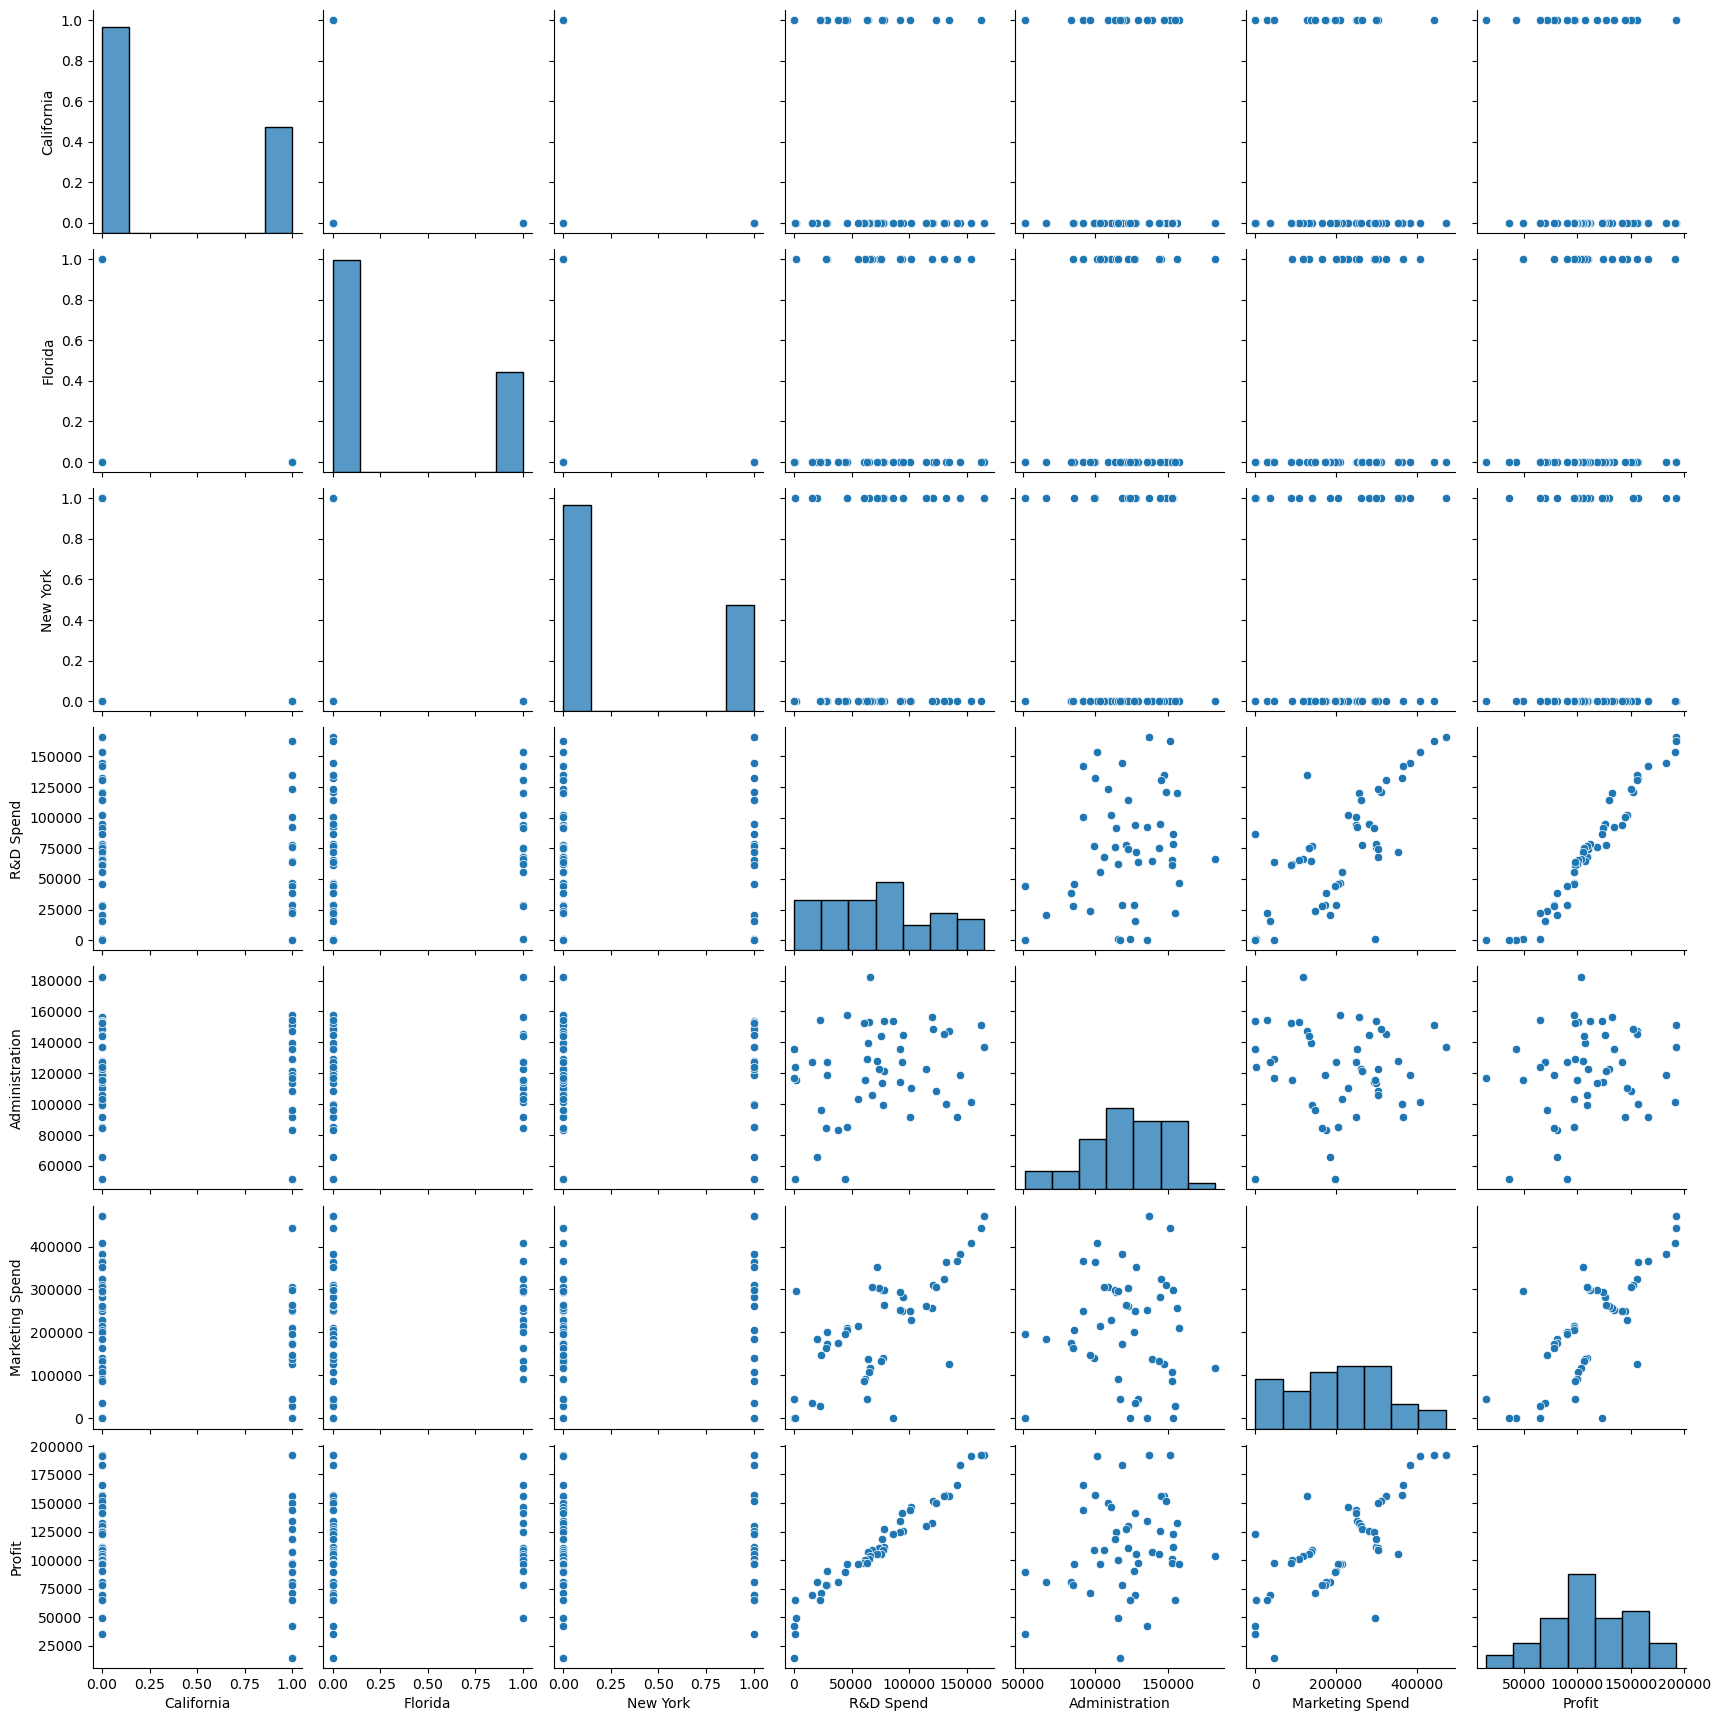

In [21]:
sns.pairplot(dataset)
plt.show()

In [22]:
dataset1 = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Multi Linear Regression\50_Startups.csv")

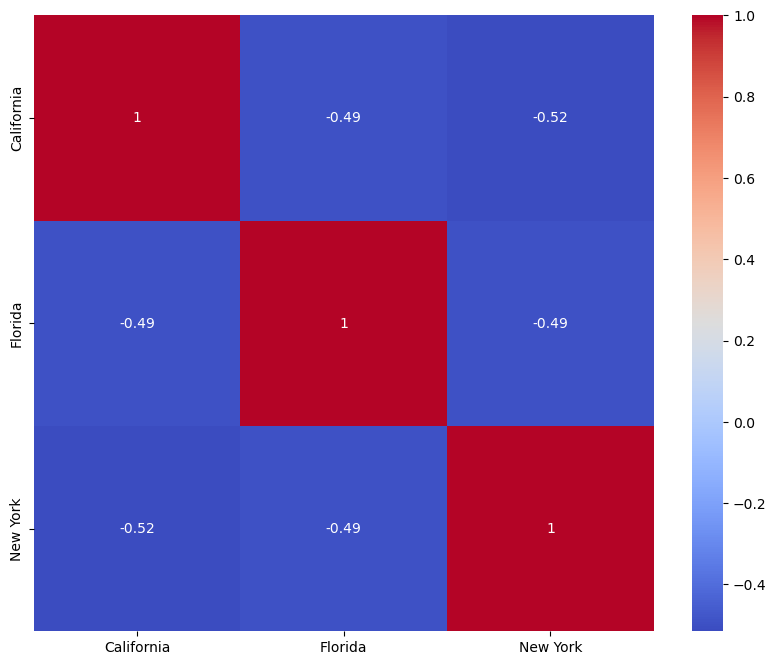

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

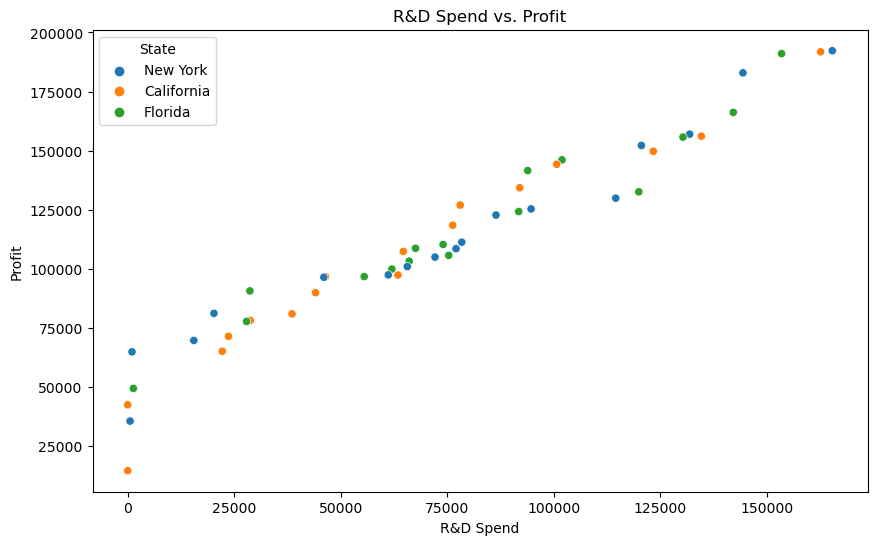

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R&D Spend', y='Profit', data=dataset1, hue='State')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs. Profit')
plt.show()

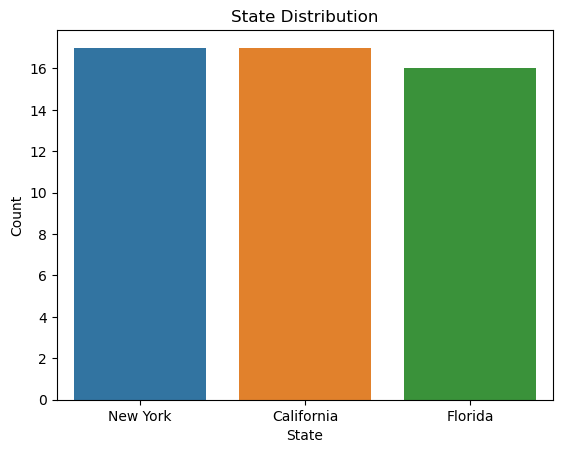

In [25]:
sns.countplot(data=dataset1, x='State')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Distribution')
plt.show()

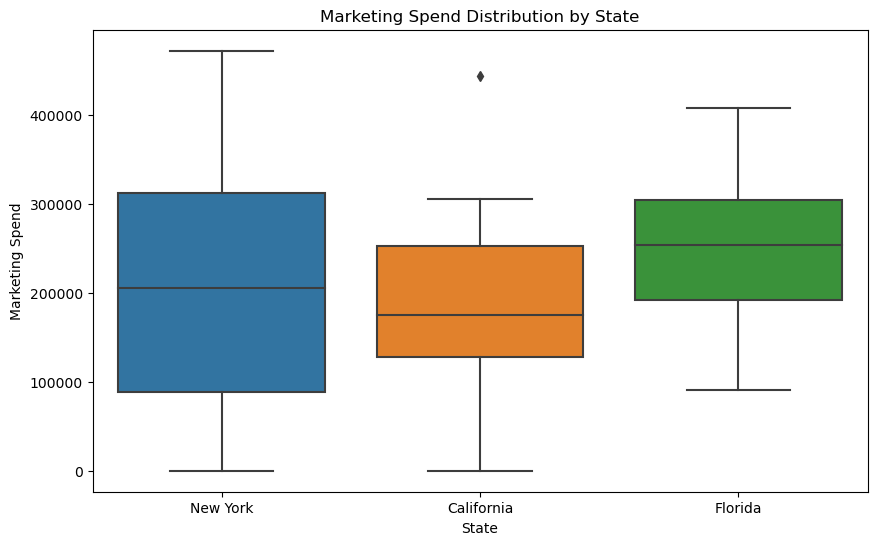

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Marketing Spend', data=dataset1)
plt.xlabel('State')
plt.ylabel('Marketing Spend')
plt.title('Marketing Spend Distribution by State')
plt.show()

# New Changes

In [27]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [28]:
X = sm.add_constant(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
model = sm.OLS(y_train, X_train).fit()

In [31]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF:")
print(vif_data)

VIF:
           Feature       VIF
0            const  0.000000
1       California       inf
2          Florida       inf
3         New York       inf
4        R&D Spend  3.106518
5   Administration  1.277391
6  Marketing Spend  2.977343


C:\Users\Yash\anaconda1\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Yash\anaconda1\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


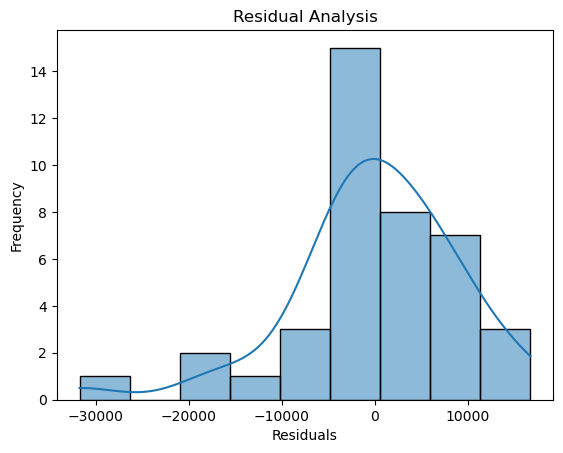

In [32]:
# Residual analysis
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.show()

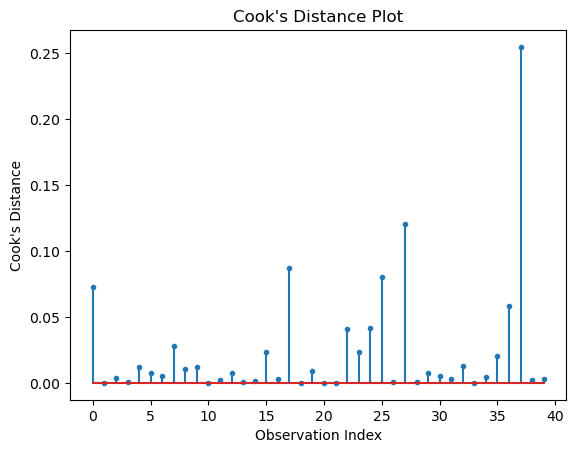

In [33]:
#Cooks Distance
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=".")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

In [34]:
# Identify high-leverage points
leverage_cutoff = 3 * ((X_train.shape[1] + 1) / X_train.shape[0])
high_leverage_points = np.where(influence.hat_matrix_diag > leverage_cutoff)[0]
print(f"High Leverage Points: {high_leverage_points}")

High Leverage Points: []


In [35]:
X_final = X_train.drop(index=high_leverage_points)
y_final = y_train.drop(index=high_leverage_points)
final_model = LinearRegression()
final_model.fit(X_final, y_final)

LinearRegression()

In [36]:
X_test_final = X_test.drop(index=high_leverage_points)
y_pred = final_model.predict(X_test_final)

In [37]:
r2_value = r2_score(y_test, y_pred)
print(f"R-squared value for the final model: {r2_value}")

R-squared value for the final model: 0.8535010081942714
